### Random Search
L'algorithme teste P directions unitaires aléatoires à chaque itération et accepte celle qui **diminue le plus** la fonction objectif $g(w)$. Le suivi de la performance se fait via la courbe d'historique du coût $ k ↦ g(w^k) $, **indépendante de la dimension**.

On va intégrer :
* différentes stratégies de pas ($\alpha$ fixe et décroissant),
* suivi graphique de la fonction objectif $g(w)$ via contour plots,
* courbes d'historique du coût $k \mapsto g(w^k)$.

On va choisir pour l'exemple une fonction 2D simple comme $g(x,y) = x^2 + y^2$ pour visualiser facilement les résultats.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# fonction objectif 
def g(w):
    x, y = w
    return x**2 + y**2

# Random Search Algorithm
def random_search(g, w0, alpha_strategy, K=50, P=5):
    """
    g : fonction objectif
    w0 : point initial (numpy array)
    alpha_strategy : fonction qui renvoie alpha_k pour itération k
    K : nombre d'itérations
    P : nombre de directions aléatoires testées par itération
    """
    w = w0.copy()
    history = [g(w)]
    
    for k in range(1, K+1):
        alpha = alpha_strategy(k)
        best_w = w
        best_val = g(w)
        
        for _ in range(P):
            d = np.random.randn(len(w))
            d /= np.linalg.norm(d)  # direction unitaire
            candidate = w + alpha * d
            val = g(candidate)
            if val < best_val:
                best_val = val
                best_w = candidate
        
        w = best_w
        history.append(g(w))
    return w, history

# Stratégies de pas

alpha_fixed_0_1 = lambda k: 0.1
alpha_fixed_1 = lambda k: 1
alpha_decaying = lambda k: 1 / k

In [6]:
# Contour plot helper pour visualiser

def plot_contour(g, history, title=""):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = g([X, Y])
    
    plt.figure(figsize=(6,5))
    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    history = np.array(history)
    plt.plot(history[:,0], history[:,1], 'ro-', label="Itérations")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(label="g(x,y)")
    plt.legend()
    plt.show()




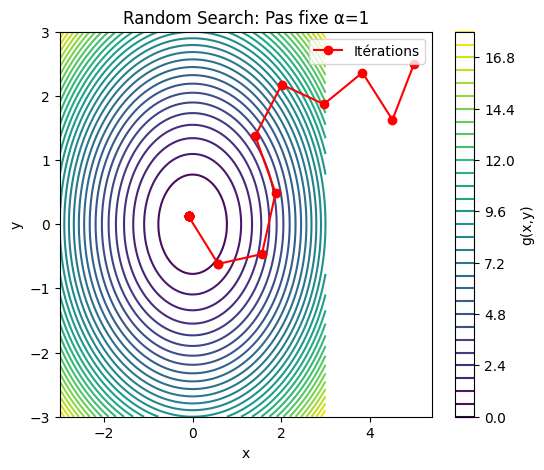

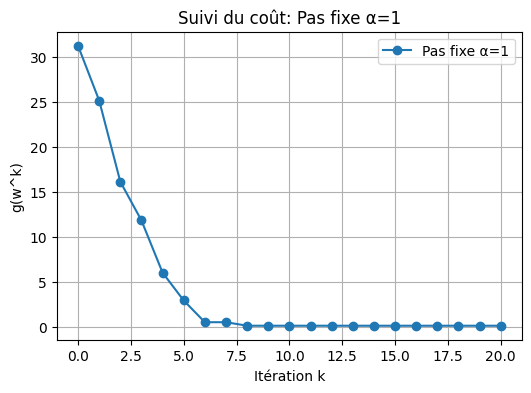

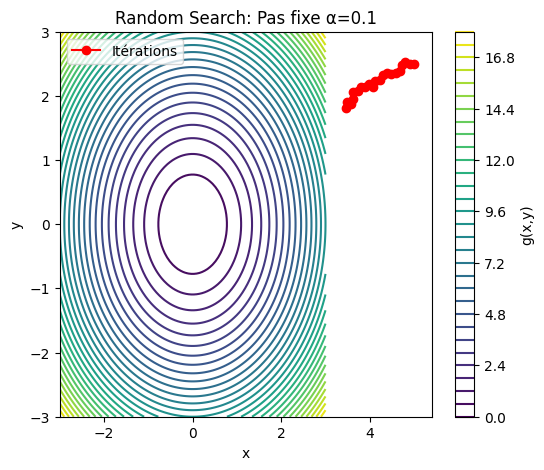

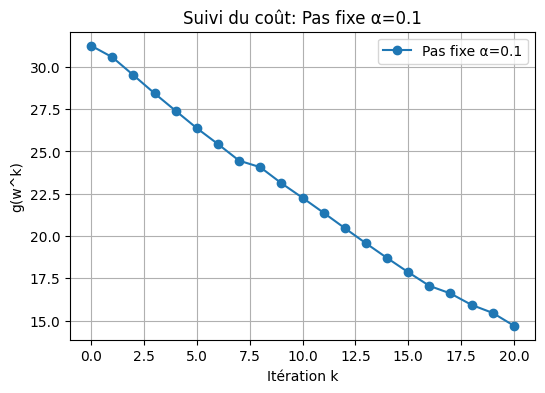

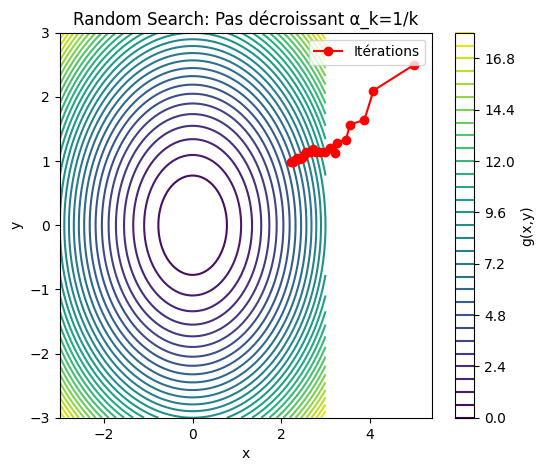

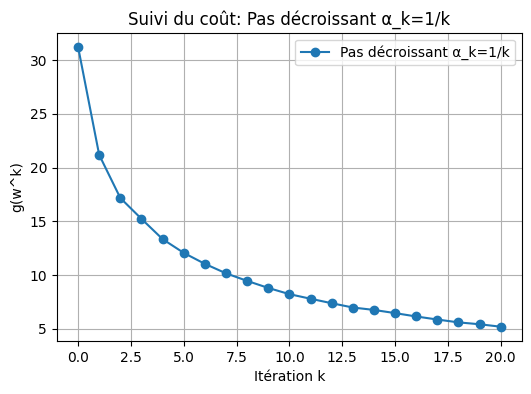

In [16]:
# Exécution pour différents pas
w0 = np.array([5, 2.5])
K = 20 # tu peux essayer de jouer avec ce K et regarder les résultats
P = 5

strategies = {
    "Pas fixe α=1": alpha_fixed_1,
    "Pas fixe α=0.1": alpha_fixed_0_1,
    "Pas décroissant α_k=1/k": alpha_decaying
}

for name, alpha_strat in strategies.items():
    w = w0.copy()
    history_points = [w.copy()]
    best_w, history_val = random_search(g, w0, alpha_strat, K=K, P=P)
    
    # Reconstruct history points for contour plotting
    w = w0.copy()
    history_points = [w.copy()]
    for k in range(1, K+1):
        alpha = alpha_strat(k)
        best_candidate = w
        best_val = g(w)
        for _ in range(P):
            d = np.random.randn(len(w))
            d /= np.linalg.norm(d)
            candidate = w + alpha*d
            val = g(candidate)
            if val < best_val:
                best_val = val
                best_candidate = candidate
        w = best_candidate
        history_points.append(w.copy())
    
    # Tracé du contour + trajectoire
    plot_contour(g, history_points, title=f"Random Search: {name}")
    
    # Tracé du suivi du coût
    plt.figure(figsize=(6,4))
    plt.plot(history_val, 'o-', label=f"{name}")
    plt.xlabel("Itération k")
    plt.ylabel("g(w^k)")
    plt.title(f"Suivi du coût: {name}")
    plt.grid(True)
    plt.legend()
    plt.show()


#### Interprétations
La focntion étant donnée convexe, on va remarquer que le pas grand nous aide à trouver le minimum plus vite, le pas fixe en $0.1$ épuise ses itarations avant d'atteindre le minmimun, tandis que le pas ajusté montre une stagnation avec un nombre petit des itérations.